In [1]:
import geopandas as gp
import pandas as pd
import os
import json
import pylab as pl
import statsmodels.formula.api as smf

%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
nrg = gp.GeoDataFrame.from_csv("Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")
print nrg.columns


Index([u'NYC Borough, Block, and Lot (BBL)', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'],
      dtype='object')


In [3]:
bsize = gp.GeoDataFrame.from_file("Manhattan/MNMapPLUTO.shp")
print bsize.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d824190>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12e5e9810>]], dtype=object)

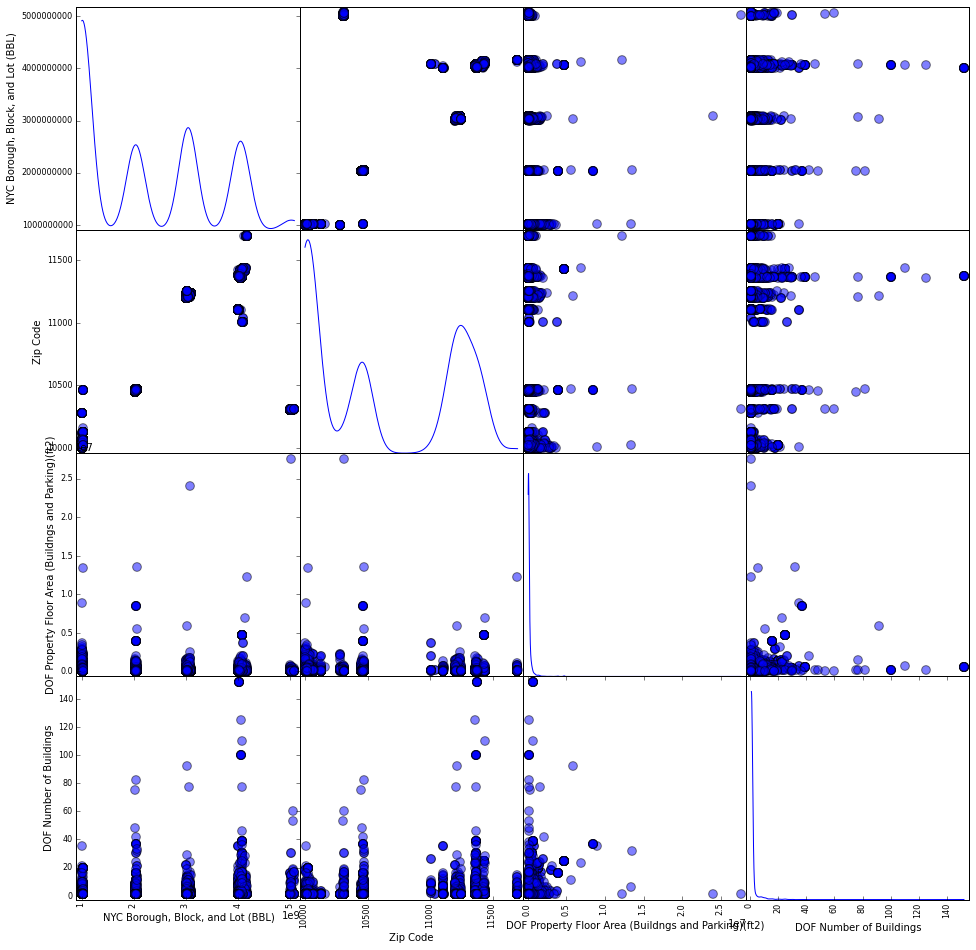

In [4]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16), diagonal='kde')


In [5]:
nrg['Site EUI(kBtu/ft2)'] = nrg['Site EUI(kBtu/ft2)'].convert_objects(convert_numeric=True)
nrg['Reported Property Floor Area (Building(s)) (ft²)'] = nrg['Reported Property Floor Area (Building(s)) (ft²)'].convert_objects(convert_numeric=True)

In [6]:
print nrg['Site EUI(kBtu/ft2)'].astype(float)
print bsize['BBL'].astype(float)

Record Number
16099      180.5
500         82.1
5017       137.7
5116       103.2
363         74.0
6876        36.4
10714      114.8
1214       130.0
1544       138.3
1905     56909.0
2301        88.2
15059       15.7
674          NaN
2537        85.7
2841       195.7
2945        79.1
15120      144.1
3053       200.9
4233       104.6
4777        86.7
4912       102.1
5210        21.2
5295        78.3
1575         NaN
15025       55.2
4208        83.2
4799       145.1
1568        59.4
5427        88.7
5476       100.8
          ...   
14559        NaN
14560        NaN
14748        NaN
14753        NaN
13582        NaN
13947        NaN
14777        NaN
14779        NaN
14409        NaN
13262        NaN
13261        NaN
12523        NaN
12529        NaN
12536        NaN
13929        NaN
13944        NaN
13945        NaN
13821        NaN
13829        NaN
13837        NaN
13838        NaN
13847        NaN
14352        NaN
12976        NaN
12978        NaN
12984        NaN
12987        NaN


In [7]:
nrg['BBL'] = nrg['NYC Borough, Block, and Lot (BBL)']
bblnrgdata = nrg.merge( bsize, on=['BBL'])

//anaconda/lib/python2.7/site-packages/pandas/core/index.py:1695: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  indexer = self._engine.get_indexer(target.values)
//anaconda/lib/python2.7/site-packages/pandas/core/index.py:1049: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return key in self._engine


In [8]:
print bblnrgdata['Reported Property Floor Area (Building(s)) (ft²)'][:10]
print bblnrgdata['Site EUI(kBtu/ft2)'][:10]

0    235370
1     64806
2     62839
3     98000
4    204417
5     60110
6    457946
7    511001
8     56442
9     60939
Name: Reported Property Floor Area (Building(s)) (ft²), dtype: float64
0       82.1
1      137.7
2      103.2
3       74.0
4      130.0
5      138.3
6    56909.0
7       88.2
8       15.7
9        NaN
Name: Site EUI(kBtu/ft2), dtype: float64


//anaconda/lib/python2.7/site-packages/pandas/core/index.py:1572: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return self._engine.get_loc(_values_from_object(key))


In [9]:
bblnrgdata['total_energy'] = bblnrgdata['Reported Property Floor Area (Building(s)) (ft²)'] * bblnrgdata['Site EUI(kBtu/ft2)']
bblnrgdata['number_of_units'] = bblnrgdata['UnitsTotal']
print bblnrgdata['total_energy'].describe()

count    5.089000e+03
mean     2.128685e+08
std      5.235185e+09
min      0.000000e+00
25%      5.865608e+06
50%      9.350994e+06
75%      1.907602e+07
max      3.501452e+11
Name: total_energy, dtype: float64


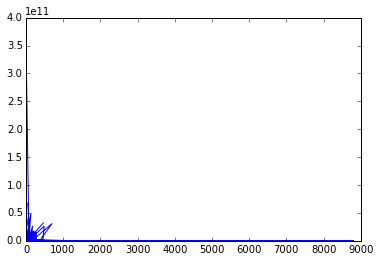

In [10]:
pl.plot(bblnrgdata['number_of_units'], bblnrgdata['total_energy'])

0    19323877.0
1     8923786.2
2     6484984.8
3     7252000.0
4    26574210.0
Name: total_energy, dtype: float64
count    5.089000e+03
mean     2.128685e+08
std      5.235185e+09
min      0.000000e+00
25%      5.865608e+06
50%      9.350994e+06
75%      1.907602e+07
max      3.501452e+11
Name: total_energy, dtype: float64
0     24
1     62
2     85
3    128
4     10
Name: number_of_units, dtype: int64
count    6545.000000
mean      108.214515
std       251.438409
min         0.000000
25%        16.000000
50%        57.000000
75%       115.000000
max      8800.000000
Name: number_of_units, dtype: float64


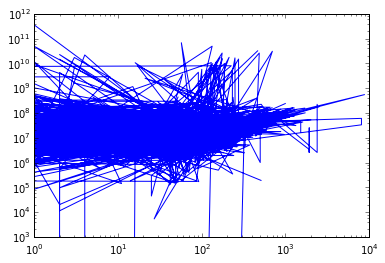

In [11]:
pl.plot(bblnrgdata['number_of_units'], bblnrgdata['total_energy'])
pl.yscale('log')
pl.xscale('log')
print bblnrgdata['total_energy'].head()
print bblnrgdata['total_energy'].describe()
print bblnrgdata['number_of_units'].head()
print bblnrgdata['number_of_units'].describe()

In [50]:
bblnrgcut = bblnrgdata[(bblnrgdata['total_energy'] > 1000) & (bblnrgdata['total_energy'] < 
                       1e+10) & (bblnrgdata['number_of_units']>0) & (bblnrgdata['number_of_units']<1000)]

In [51]:
X = bblnrgcut['number_of_units']
Y = bblnrgcut['total_energy']
x1 = np.log10(X)
y1 = np.log10(Y)

data = pd.DataFrame({'x': x1, 'y':y1})
data.x = data.x.replace([np.inf, -np.inf], np.nan)
data.y = data.y.replace([np.inf, -np.inf], np.nan)
model = smf.ols(formula = 'y ~ x', data=data, missing = 'drop').fit()
print model.summary()
print model.params[0]
print model.params[1]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     56.32
Date:                Sun, 18 Oct 2015   Prob (F-statistic):           7.26e-14
Time:                        12:17:28   Log-Likelihood:                -3378.5
No. Observations:                4956   AIC:                             6761.
Df Residuals:                    4954   BIC:                             6774.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.9143      0.018    387.562      0.0

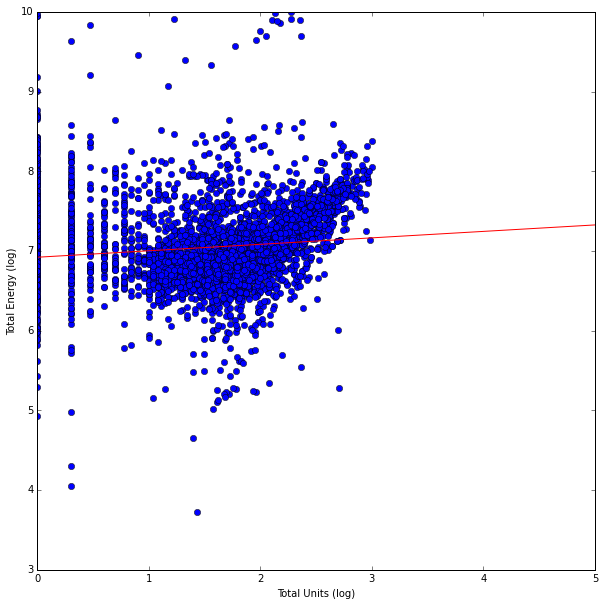

In [70]:
pl.figure(figsize = (10,10))
line = np.arange(0, 6, 1)
form = 0.0811*line + 6.9209
pl.plot(x1,y1, 'bo')
pl.plot(line, form, 'red')
pl.xlabel('Total Units (log)')
pl.ylabel('Total Energy (log)')

In [53]:
model2 = smf.ols(formula = 'x ~ y', data=data, missing = 'drop').fit()
print model2.summary()
print model2.params[0]
print model2.params[1]

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     56.32
Date:                Sun, 18 Oct 2015   Prob (F-statistic):           7.26e-14
Time:                        12:17:34   Log-Likelihood:                -5105.9
No. Observations:                4956   AIC:                         1.022e+04
Df Residuals:                    4954   BIC:                         1.023e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.5971      0.141      4.228      0.0

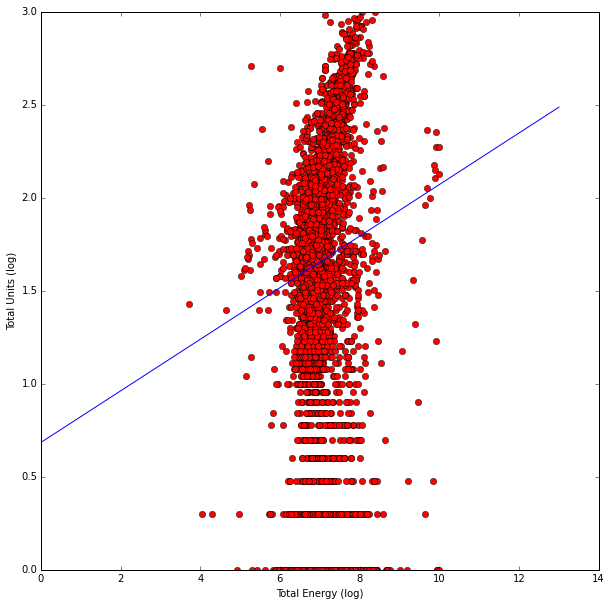

In [69]:
pl.figure(figsize = (10,10))
line = np.arange(0, 14, 1)
form2 = 0.1387*line + 0.6844
pl.plot(y1,x1, 'ro')
pl.plot(line, form2, 'blue')
pl.ylabel('Total Units (log)')
pl.xlabel('Total Energy (log)')

The better fit of these two models is the first one. They both have the same r squared value, but the first model captures the residuals better than the second one. You will not be able to perfrom a likelihood ratio test because the paramters are the same. 

In [55]:
print len(x1), len(y1)

4956 4956


In [56]:
model4 = np.polyfit(x1,y1, 2)

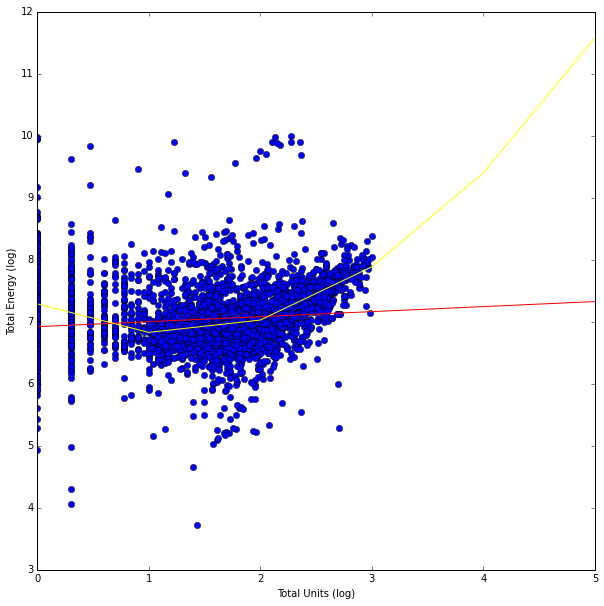

In [68]:
pl.figure(figsize= (10,10))
line = np.arange(0, 6, 1)
form = 0.0811*line + 6.9209
pl.plot(x1,y1, 'bo')
pl.plot(line, form, 'red')
form3 = model4[0]*line**2 + model4[1]*line + model4[2]
pl.plot (line, form3, 'yellow')
pl.xlabel('Total Units (log)')
pl.ylabel('Total Energy (log)')

We cannot perform a likelihood ratio test, bc the models have the same paramters. Additionally, the model that fits the data better is the one fitted with a parabola. It encapsulates more of the data on the tails. 